This script evaluates the nestedness of GCN and plot figures.

Same analysis as in the Deciphering functional redundancy in the human microbiome
[url](https://www.nature.com/articles/s41467-020-19940-1)

In [2]:
# This script evaluates the nestedness of GCN
%matplotlib inline
import os
import sys
sys.path.append('../frstruct')
import matplotlib.pyplot as plt
import pandas as pd
from nestedness_calculator import NestednessCalculator
import matplotlib.gridspec as gs
import seaborn as sns
import copy
import numpy as np
from collections import Counter
import matplotlib.image as mpimg
import matplotlib.transforms as mtransforms


In [3]:
# load GCN2008 and binarize
ori_GCN = pd.read_csv('../data/gcn2008.tsv', sep='\t', index_col=0, header=0)
d_df = pd.read_csv('../data/sp_d.tsv', sep='\t', header=0, index_col=0)
bi_GCN = copy.deepcopy(ori_GCN)
bi_GCN[bi_GCN>1] = 1
odir = '../result/GCN_evaluation'
if not os.path.exists(odir):
    os.makedirs(odir)

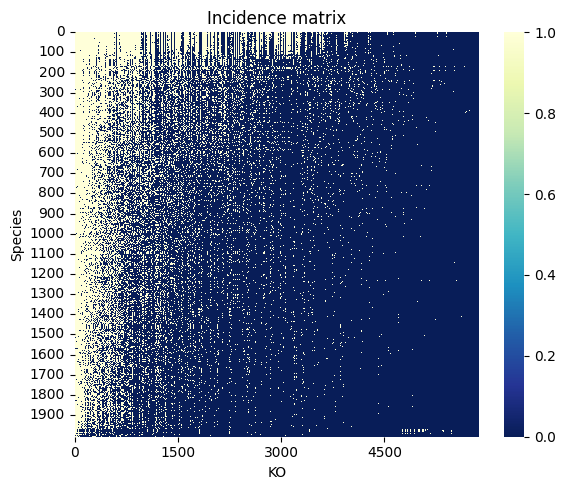

In [4]:
plt.figure(figsize=(6, 5))
# plot b
mean = bi_GCN.mean(axis=0)
cids = list(bi_GCN.mean(axis=0).sort_values(ascending=False).index)
rids = list(bi_GCN.mean(axis=1).sort_values(ascending=False).index)
sorted_bi = bi_GCN.loc[rids, cids]
#plt.figure(figsize = (5,5))
sns.heatmap(sorted_bi.values,  cmap='YlGnBu_r', vmin=0, vmax=1)
plt.xticks(ticks=np.arange(0, 6000, 1500), labels = np.arange(0, 6000, 1500), rotation=0)
plt.yticks(ticks=np.arange(0, 2000, 100), labels=np.arange(0, 2000, 100))
plt.xlabel('KO')
plt.ylabel('Species')
plt.title('Incidence matrix')
plt.tight_layout()
plt.savefig(os.path.join(odir, 'incidence.png'), dpi=300)

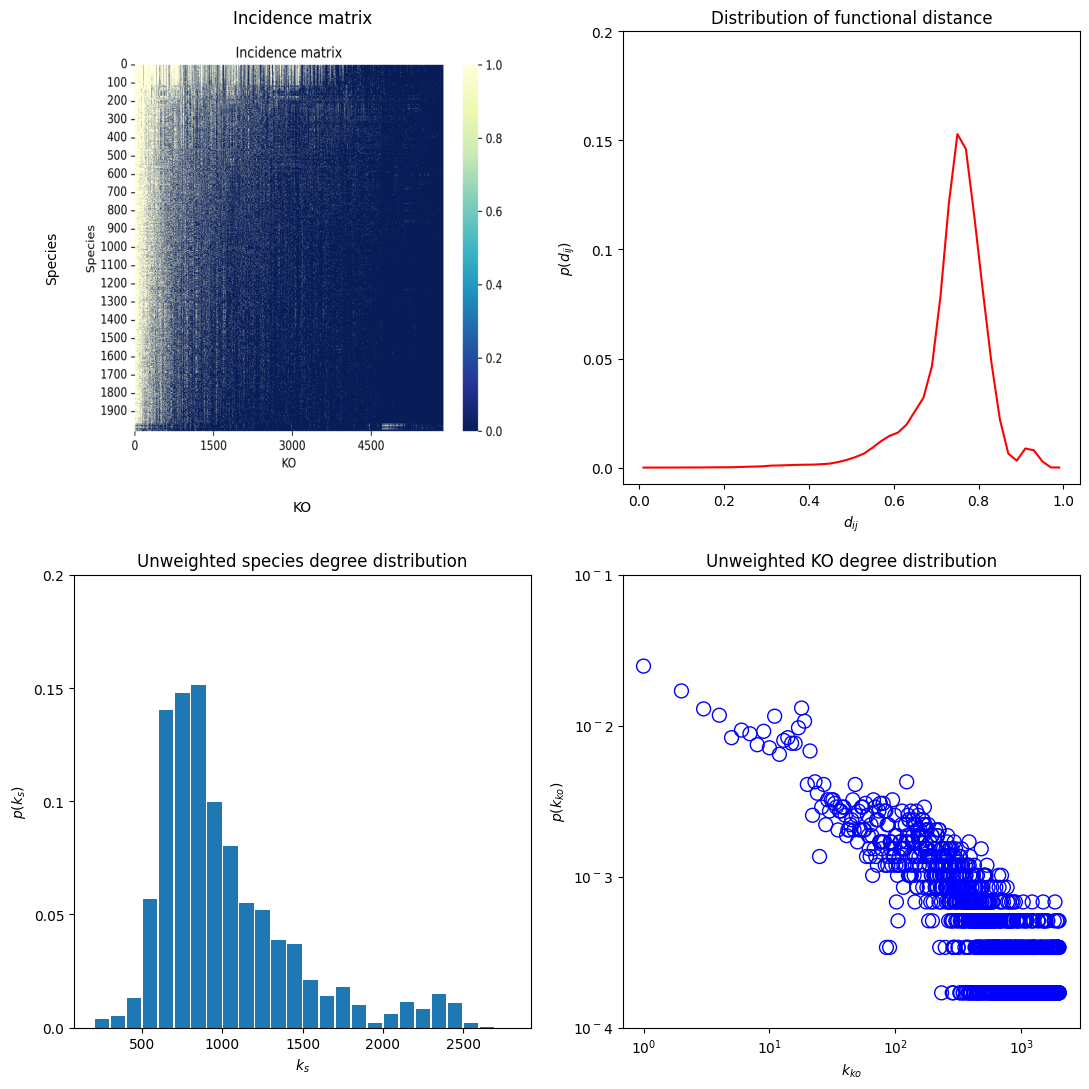

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(11, 11))
'''
# plot b
mean = bi_GCN.mean(axis=0)
cids = list(bi_GCN.mean(axis=0).sort_values(ascending=False).index)
rids = list(bi_GCN.mean(axis=1).sort_values(ascending=False).index)
sorted_bi = bi_GCN.loc[rids, cids]
#plt.figure(figsize = (5,5))
sns.heatmap(sorted_bi.values, ax=axs[0, 0], cmap='YlGnBu_r', vmin=0, vmax=1)
axs[0, 0].set_xticks(ticks=np.arange(0, 6000, 1500), labels = np.arange(0, 6000, 1500))
axs[0, 0].set_yticks(ticks=np.arange(0, 2000, 100), labels=np.arange(0, 2000, 100))
axs[0, 0].set_xlabel('KO')
axs[0, 0].set_ylabel('Species')
axs[0, 0].set_title('Incidence matrix')
#axs[0, 0].tight_layout()
#axs[0, 0].get_figure().savefig(os.path.join(odir, 'incidence.pdf'), dpi=100, format='pdf')
# axs[0, 0].show()
'''
image_b = mpimg.imread(os.path.join(odir, 'incidence.png'))
axs[0, 0].imshow(image_b)
axs[0, 0].set_aspect('auto')

axs[0, 0].set_title('Incidence matrix')
# axs[0, 0].set_axis_off()
axs[0, 0].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
axs[0, 0].set_xticklabels([])
axs[0, 0].set_yticklabels([])
axs[0, 0].set_xlabel('KO')
axs[0, 0].set_ylabel('Species')
axs[0, 0].spines['top'].set_visible(False)
axs[0, 0].spines['bottom'].set_visible(False)
axs[0, 0].spines['left'].set_visible(False)
axs[0, 0].spines['right'].set_visible(False)
# plot c
d_list = []
for i in range(d_df.shape[0]):
    for j in range(i+1, d_df.shape[0]): 
        d_list.append(d_df.iloc[i, j])

hist, bins = np.histogram(d_list, bins=50, range=(0,1))
freq_hist = hist/len(d_list)
y = freq_hist
x = bins[1:]-0.01
axs[0, 1].plot(x, y, marker='', linestyle='-', color='red')
axs[0, 1].set_yticks(ticks=np.linspace(0, 0.2, 5), labels = [round(x, 2) for x in np.linspace(0, 0.2, 5)])
axs[0, 1].set_xticks(ticks=np.linspace(0, 1, 6), labels=[round(x, 2) for x in np.linspace(0, 1, 6)])
axs[0, 1].set_xlabel(r'$d_{ij}$')
axs[0, 1].set_ylabel(r'$p(d_{ij})$')
axs[0, 1].set_title('Distribution of functional distance')
#plt.tight_layout()
#axs[0, 1].get_figure().savefig(os.path.join(odir, 'd_distri.pdf'), dpi=300, format='pdf')
#plt.savefig(os.path.join(odir, 'd_distri.png'), dpi=300)
#plt.show()

# d
un_degree = bi_GCN.sum(axis=1)
hist, bins = np.histogram(un_degree.values, bins=26, range=(200,2800))
y = hist/len(un_degree)
x = bins[1:] - 50
#plt.figure(figsize = (5,5))
axs[1, 0].bar(x, y, align='center', width = 90)
axs[1, 0].set_yticks(ticks=np.linspace(0, 0.2, 5), labels = [round(x, 2) for x in np.linspace(0, 0.2, 5)])
axs[1, 0].set_xlabel(r'$k_{s}$')
axs[1, 0].set_ylabel(r'$p(k_{s})$')
axs[1, 0].set_title('Unweighted species degree distribution')
#plt.tight_layout()
#axs[1, 0].get_figure().savefig(os.path.join(odir, 'k_s_distri.pdf'), dpi=300, format='pdf')
#plt.savefig(os.path.join(odir, 'k_s_distri.png'), dpi=300)
#plt.show()

# plot e
ko_un_degree = bi_GCN.sum(axis=0)
count = Counter(ko_un_degree.values)
y = []
x = []
for num, freq in count.items():
    y.append(freq/len(ko_un_degree))
    x.append(num)

x = [np.log10(i) for i in x]
y = [np.log10(i) for i in y]
#plt.figure(figsize = (5,5))
axs[1, 1].scatter(x, y, marker='o', c='none', edgecolors='b', s=100)
axs[1, 1].set_yticks(ticks=np.arange(-4, 0, 1), labels = ['$10^{}$'.format(x) for x in np.arange(-4, 0, 1)])
axs[1, 1].set_xticks(ticks=np.arange(0, 4, 1), labels = ['$10^{}$'.format(x) for x in np.arange(0, 4, 1)])
axs[1, 1].set_xlabel(r'$k_{ko}$')
axs[1, 1].set_ylabel(r'$p(k_{ko})$')
axs[1, 1].set_title('Unweighted KO degree distribution')
#plt.tight_layout()
#axs[1, 1].get_figure().savefig(os.path.join(odir, 'k_ko_distri.pdf'), dpi=300, format='pdf')
#plt.savefig(os.path.join(odir, 'k_ko_distri.png'), dpi=300)
#plt.show()

plt.tight_layout()
#for ax in axs.flat:
#    ax.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.2) 
plt.savefig(os.path.join(odir, 'evaluation.pdf'),format='pdf', dpi=300)
plt.savefig(os.path.join(odir, 'evaluation.png'),format='png', dpi=300)


In [6]:

fig.savefig(os.path.join(odir, 'distri_d.pdf'), bbox_inches=mtransforms.Bbox([[0.5, 0.5], [1, 1]]).transformed(fig.transFigure - fig.dpi_scale_trans), format='pdf', dpi=300)

extent = axs[1, 0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig(os.path.join(odir, 'distri_sp.pdf'), bbox_inches=mtransforms.Bbox([[0, 0], [0.5, 0.5]]).transformed(fig.transFigure - fig.dpi_scale_trans), format='pdf', dpi=300)

extent = axs[1, 1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig(os.path.join(odir, 'distri_ko.pdf'), bbox_inches=mtransforms.Bbox([[0.5, 0], [1, 0.5]]).transformed(fig.transFigure - fig.dpi_scale_trans), format='pdf', dpi=300)

fig.savefig(os.path.join(odir, 'heatmap.png'), bbox_inches=mtransforms.Bbox([[0, 0.5], [0.5, 1]]).transformed(fig.transFigure - fig.dpi_scale_trans), dpi=300)

fig.savefig(os.path.join(odir, 'distri_d.png'), bbox_inches=mtransforms.Bbox([[0.5, 0.5], [1, 1]]).transformed(fig.transFigure - fig.dpi_scale_trans), dpi=300)

extent = axs[1, 0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig(os.path.join(odir, 'distri_sp.png'), bbox_inches=mtransforms.Bbox([[0, 0], [0.5, 0.5]]).transformed(fig.transFigure - fig.dpi_scale_trans), dpi=300)

extent = axs[1, 1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig(os.path.join(odir, 'distri_ko.png'), bbox_inches=mtransforms.Bbox([[0.5, 0], [1, 0.5]]).transformed(fig.transFigure - fig.dpi_scale_trans), dpi=300)


In [7]:
# compute nestedness
nested_nodf_score = NestednessCalculator(sorted_bi.values).nodf(sorted_bi.values)
nested_nodf_score

0.3695689146766152